# Regression and R Formula

Statistical regression is the use of a model to predict the values of a **response** variable given one or more **predictor** variables. If there is a single predictor variable, then the model is univariate; otherwise the model is a multivariate regression model. 

Finding a "good" predictive model is difficult - for example, here are some questions to be addressed:

- What type of regression model do we use?
- What are the model assumptions and are they met?
- Is there any variable transform that could be useful?
- What predictive variables do we include?
- What interactions between predictive variables are important?
- Are there clustering effects we must take into account?
- How do we compare different models and choose the "best" one?

For these reasons, regression modeling is an advanced statistical topic that will take a lot of effort to learn well - here our goal is to provide a framework for understanding regression models so that you can communicate and collaborate more effectively with your statistician colleagues. 

In this session, we use R to fit simple linear regression models where the response variable is continuous. We will see other types of response variables in the session on Generalized Linear Models.

In [1]:
suppressMessages(library(dplyr))
library(ggplot2)
suppressMessages(library(nlme))

## Simple linear regression

A simple linear model is of the form

$$y_i = \alpha + \beta x_i + \epsilon_i$$

The goal of a linear regression is to find the line

$$ y = \alpha +\beta x$$

that best fits the data. i.e. we find the line such that the sum of the squared errors is minimized. A key assumption in such a model is that the errors follow a standard normal distribution. This is important, because when this assumption is invalid, applying the standard confidence interval calculation for the slope $\beta$ will be wrong.

In R, the model $y_i = \alpha + \beta x_i + \epsilon_i$ is written as a **formula**

```R
y ~ x
```

where it is assumed that there is an intercept to be fitted. If you don't want to fit an intercept (because it must be zero), i.e. the model is $y_i = \beta x_i + \epsilon_i$, the formula is

```R
y ~ x - 1
```

We can also use transformed variables in R formula, e.g.

```R
y ~ log(x)
```

### Assumptions of simple linear models

- Normality - for fixed values of the predictor variables, the response variables are normally distributed
- Independence - the response variables are independent of each other
- Linearity - the response variable is linearly related to the predictor variable
- Homoscedasticity - the variance is constant across different values of the predictor variable

Consider a regression of weight against height to fix the interpretation of these assumptions

- Normality - the distribution of weights for a fixed height (e.g. 6 feet 1 inch) is normally distributed
- Independence - the weight of one person is independent of the weight of another person (may not be true if they come from the same family with shared genes and environment)
- Linearity - the assumption that weight is a function of (intercept + slope $\times$ height + error)
- Homoscedasticity - the variance in weight is the same for short people and for tall people

In [2]:
hw <- read.csv("heightweight.csv")

**1**. Print the structure of the data frame.

In [3]:
str(hw)

'data.frame':	237 obs. of  5 variables:
 $ sex     : Factor w/ 2 levels "f","m": 1 1 1 1 1 1 1 1 1 1 ...
 $ ageYear : num  11.9 12.9 12.8 13.4 15.9 ...
 $ ageMonth: int  143 155 153 161 191 171 185 142 160 140 ...
 $ heightIn: num  56.3 62.3 63.3 59 62.5 62.5 59 56.5 62 53.8 ...
 $ weightLb: num  85 105 108 92 112 ...


**2**. Print out a summary of descriptive statistics for each variable in the data frame.

In [4]:
summary(hw)

 sex        ageYear         ageMonth        heightIn        weightLb    
 f:111   Min.   :11.58   Min.   :139.0   Min.   :50.50   Min.   : 50.5  
 m:126   1st Qu.:12.33   1st Qu.:148.0   1st Qu.:58.80   1st Qu.: 85.0  
         Median :13.58   Median :163.0   Median :61.50   Median :101.0  
         Mean   :13.70   Mean   :164.4   Mean   :61.36   Mean   :101.3  
         3rd Qu.:14.83   3rd Qu.:178.0   3rd Qu.:64.30   3rd Qu.:112.0  
         Max.   :20.83   Max.   :250.0   Max.   :72.00   Max.   :171.5  

**3**. Show 10 rows chosen at random from the data frame.

In [5]:
sample_n(hw, 10)

sex  ageYear ageMonth heightIn weightLb
163   m 14.08333      169     62.0    100.0
3     f 12.75000      153     63.3    108.0
65    f 12.83333      154     60.0    114.0
145   m 16.08333      193     66.3    133.0
152   m 14.58333      175     63.5     98.5
46    f 15.33333      184     62.3    108.0
56    f 12.08333      145     57.8     84.0
124   m 14.41667      173     61.3     93.0
52    f 16.41667      197     64.8    112.0
165   m 12.50000      150     59.5     84.0

**4**. Using `ggplot`, show separate scatter plots of height (y-axis) against weight (x-axis) for each sex, together with a fitted linear regression line.

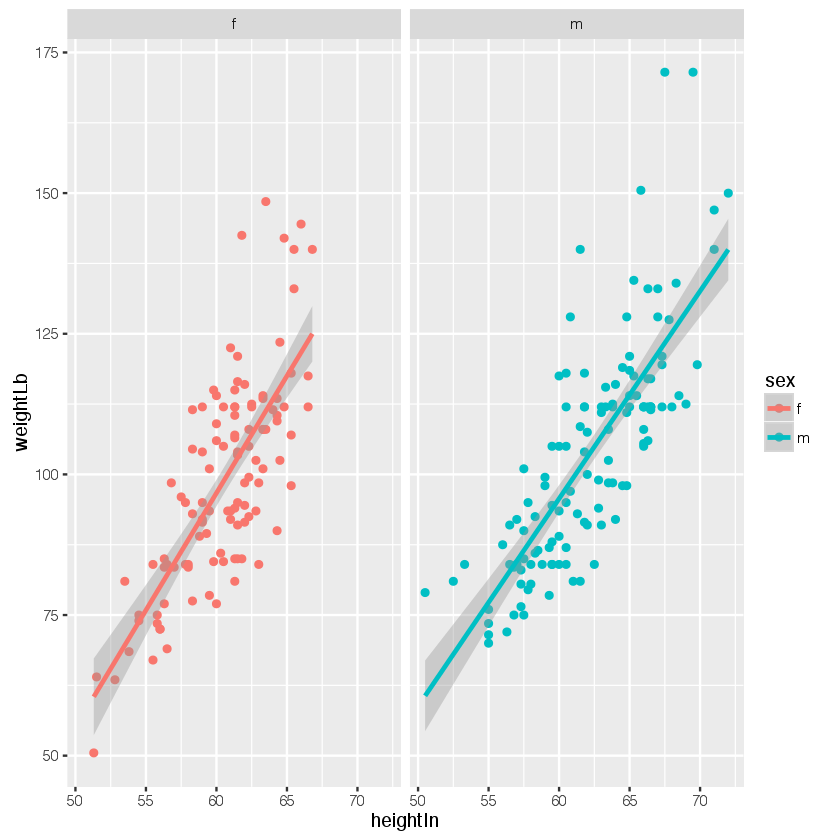

In [6]:
ggplot(hw, aes(x=heightIn, y=weightLb, color=sex)) + 
geom_point() + 
geom_smooth(method=lm) + 
facet_wrap(~ sex)

**5**. Fit a simple linear model using `lm` using `weightLb` as the outcome and `heightIn` as the predictor. Save the fit in a variable called `fit1`. In R, you would use the formula `weightLb ~ heightIn` to represent the linear model being fitted.

In [7]:
fit1 <- lm(weightLb ~ heightIn, data=hw)

**6**. Summarize the fitted model using the `summary` function and interpret the output.

In [8]:
summary(fit1)


Call:
lm(formula = weightLb ~ heightIn, data = hw)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.552  -8.880  -1.461   6.811  46.766 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -132.9910    12.4937  -10.64   <2e-16 ***
heightIn       3.8181     0.2032   18.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.31 on 235 degrees of freedom
Multiple R-squared:  0.6004,	Adjusted R-squared:  0.5987 
F-statistic: 353.1 on 1 and 235 DF,  p-value: < 2.2e-16


**6.1** The **residuals** are the differences between the observed and predicted y-values.

**6.2**. The **Residual standard error** can be thought of as the average predicted error in the response variable. 

**6.3**. The **degrees of freedom** is the number of observations minus the number of estimated parameters (intercept and slope). This is used when testing to see if the predictor variables contributed to the prediction above chnce levels.

**6.4**. The **Multiple R-squared** value is the square of the correlation and represents the % total variance explained by the predictor variables(s).

In [9]:
cor(hw$heightIn, hw$weightLb)^2

[1] 0.600433

**6.5**. The **Adjusted R-squared** adjusts for the number of parameters in the model, and only increases when adding a new predictor variable if the increase is more than would be expected by chance alone. It can be used to compare two or more models.

**6.6**. The **F-statistic** tests if the predictor variable(s) predict the response variable above chance levels.

In [10]:
anova(fit1)

Analysis of Variance Table

Response: weightLb
           Df Sum Sq Mean Sq F value    Pr(>F)    
heightIn    1  53555   53555  353.14 < 2.2e-16 ***
Residuals 235  35639     152                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**7**. Print out just the intercept and slope values.

In [11]:
coef(fit1)

(Intercept)    heightIn 
-132.991007    3.818149

In [12]:
fit1$coefficients

(Intercept)    heightIn 
-132.991007    3.818149

**8**. Find the 95% confidence intervals for the intercept and slope.

In [13]:
confint(fit1)

2.5 %      97.5 %
(Intercept) -157.604973 -108.377041
heightIn       3.417862    4.218436

**9**. Plot the fitted model using `plot`. This shows various diagnostics for whether model assumptions are met.

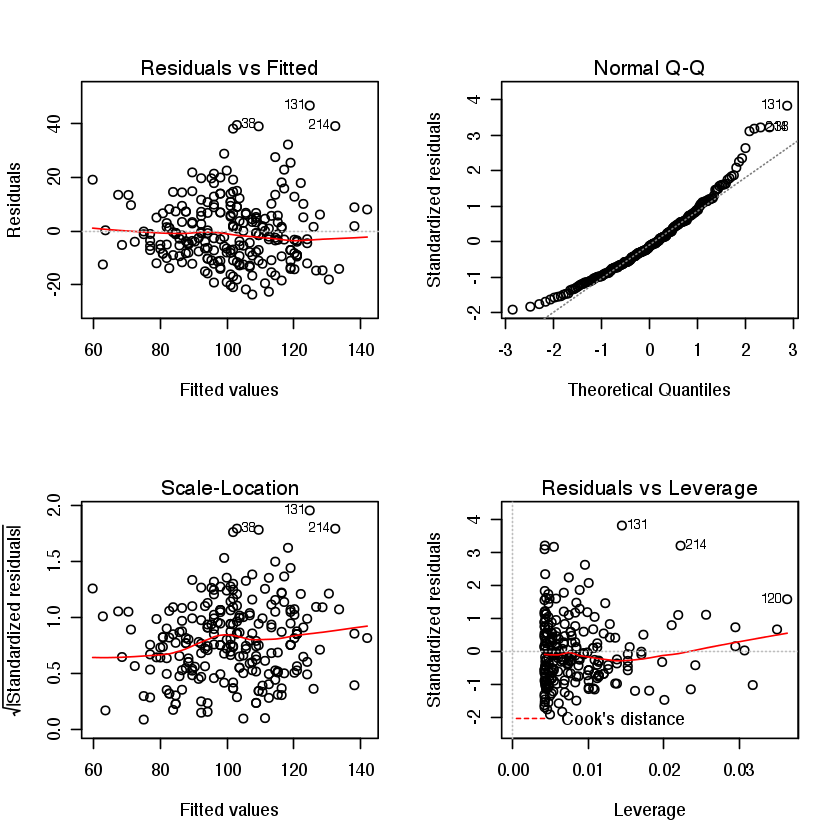

In [14]:
par(mfrow=c(2,2))
plot(fit1)

**9.1**. The first (top left) plot shows residuals against the predictor variables. These are teh $\epsilon_i$ terms in the model. We want them to be normally distributed with a mean of zero.

**9.2**. The second (top right) plot shows the QQ plot of the standardized residuals - if the residuals are normally distributed, this will be a straight diagonal line.

**9.3**. The third (bottom left) plot shows if the variance is constant across the predictor variable. If this is true (homoscedasticity), then the points fall in a horizontal band.

**9.4** The fourth (bottom right) plot is quite hard to interpret, but you can think of it as detecting outliers in response space (high positive or negative standardized residuals) or in predictor space (high leverage indicates observations with and unusual combination of predictor variables).

**10**. Predict what the weight of two new people who are 68 and 72 inches tall would be using `predict` and a new data frame containing the heights of interest.

In [15]:
predict(fit1, data.frame(heightIn = c(68, 72)))

1        2 
126.6431 141.9157

**11**. Add the fitted line to a scatter plot of weight against height using `geom_abline`.  

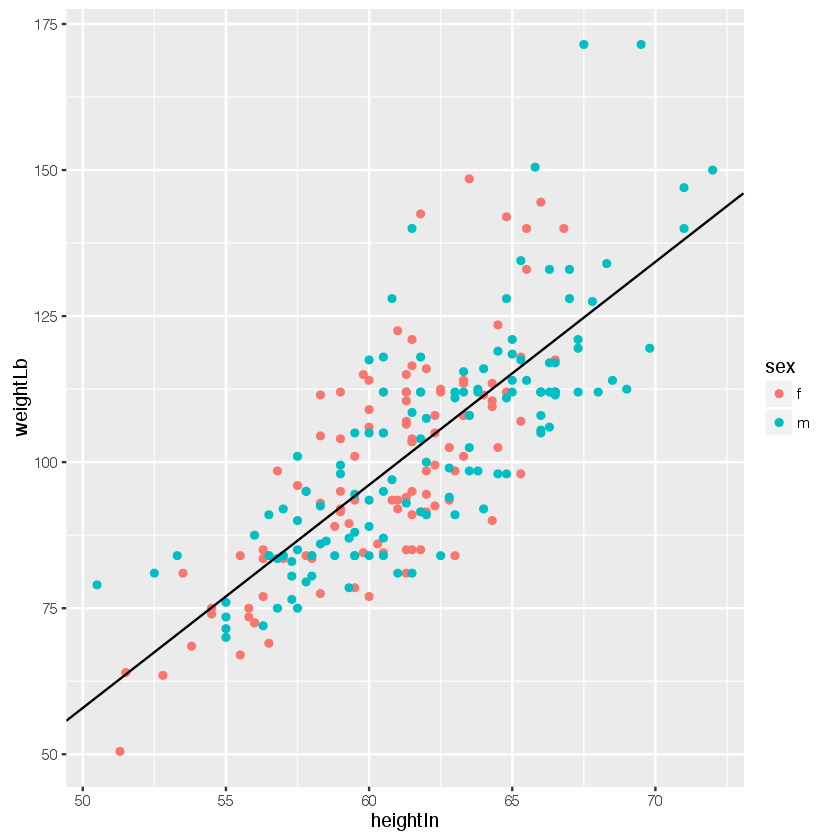

In [16]:
ggplot(hw, aes(x=heightIn, y=weightLb, color=sex)) + 
geom_point() + 
geom_abline(intercept = fit1$coefficients[1], slope =fit1$coefficients[2])

## Multiple linear regression

A more complicated linear model might include more than one main effect and/or interaction terms such as:

$$ y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 +\epsilon$$

Below is a table of R formula syntax and the corresponding model. There are others, but that is a topic for more advanced study.


|       Syntax       | Model |
| ------------------ | ----- |
| $x_1 + x_2 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ | $y = \alpha + \beta_1 x_1 + \beta_2 x_2  +\epsilon$ |
| $x_1:x_1$ | $y = \alpha + \beta x_1 x_2 +\epsilon \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ |
| $x_1 * x_2$ | $y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 +\epsilon \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ |
| $x_1 * x_2 *x_3$ | $y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +\beta_4 x_1 x_2 +\beta_5 x_1 x_3 + \beta_6 x_2 x_3 + \beta_7 x_1 x_2 x_3 +\epsilon$ |
| $(x_1 + x_2 + x_3)^2$ | $y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +\beta_4 x_1 x_2 +\beta_5 x_1 x_3 + \beta_6 x_2 x_3 +\epsilon$ |

**12**. Now fit the weight using a linear model with the predictors `height`, `sex` and check if there is a significant interaction between them.

#### R formula for interaction terms

In [17]:
summary(lm(weightLb ~ heightIn + sex + heightIn:sex, hw))


Call:
lm(formula = weightLb ~ heightIn + sex + heightIn:sex, data = hw)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.179  -8.100  -1.842   7.277  48.139 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -153.1289    21.1922  -7.226 7.06e-12 ***
heightIn         4.1636     0.3496  11.910  < 2e-16 ***
sexm            27.4308    26.5725   1.032    0.303    
heightIn:sexm   -0.4738     0.4342  -1.091    0.276    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.31 on 233 degrees of freedom
Multiple R-squared:  0.6039,	Adjusted R-squared:  0.5988 
F-statistic: 118.4 on 3 and 233 DF,  p-value: < 2.2e-16


#### An alternative formula

In [18]:
summary(lm(weightLb ~ heightIn*sex, hw))


Call:
lm(formula = weightLb ~ heightIn * sex, data = hw)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.179  -8.100  -1.842   7.277  48.139 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -153.1289    21.1922  -7.226 7.06e-12 ***
heightIn         4.1636     0.3496  11.910  < 2e-16 ***
sexm            27.4308    26.5725   1.032    0.303    
heightIn:sexm   -0.4738     0.4342  -1.091    0.276    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.31 on 233 degrees of freedom
Multiple R-squared:  0.6039,	Adjusted R-squared:  0.5988 
F-statistic: 118.4 on 3 and 233 DF,  p-value: < 2.2e-16


**13**. Since there is no evidence for an interaction, we can use a simpler model with just the two predictors. Save this as `fit2`.

In [19]:
fit2 <- lm(weightLb ~ heightIn + sex, hw)
summary(fit2)


Call:
lm(formula = weightLb ~ heightIn + sex, data = hw)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.419  -8.425  -1.639   6.654  47.239 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -134.5375    12.6092 -10.670   <2e-16 ***
heightIn       3.8564     0.2074  18.592   <2e-16 ***
sexm          -1.5118     1.6366  -0.924    0.357    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.32 on 234 degrees of freedom
Multiple R-squared:  0.6019,	Adjusted R-squared:  0.5985 
F-statistic: 176.9 on 2 and 234 DF,  p-value: < 2.2e-16


**14**. Which model provides a better fit?

In [20]:
anova(fit1, fit2)

Analysis of Variance Table

Model 1: weightLb ~ heightIn
Model 2: weightLb ~ heightIn + sex
  Res.Df   RSS Df Sum of Sq      F Pr(>F)
1    235 35639                           
2    234 35510  1    129.48 0.8533 0.3566

In [21]:
round(AIC(fit1, fit2), 0)

df  AIC
fit1  3 1867
fit2  4 1868

In [22]:
round(BIC(fit1, fit2), 0)

df  BIC
fit1  3 1877
fit2  4 1882

**15**. Fit the following 3 models `weightLb ~ ageYear`, `weightLb ~ ageMonth` and `weightLb ~ ageYear + ageMonth`. Explain the results.

In [23]:
summary(lm(weightLb ~ ageYear, hw))


Call:
lm(formula = weightLb ~ ageYear, data = hw)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.458 -10.289  -1.958   7.854  49.506 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.7935     8.8005  -0.999    0.319    
ageYear       8.0351     0.6383  12.589   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.06 on 235 degrees of freedom
Multiple R-squared:  0.4028,	Adjusted R-squared:  0.4002 
F-statistic: 158.5 on 1 and 235 DF,  p-value: < 2.2e-16


In [24]:
summary(lm(weightLb ~ ageMonth, hw))


Call:
lm(formula = weightLb ~ ageMonth, data = hw)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.458 -10.289  -1.958   7.854  49.507 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.79351    8.80047  -0.999    0.319    
ageMonth     0.66959    0.05319  12.589   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.06 on 235 degrees of freedom
Multiple R-squared:  0.4028,	Adjusted R-squared:  0.4002 
F-statistic: 158.5 on 1 and 235 DF,  p-value: < 2.2e-16


In [25]:
summary(lm(weightLb ~ ageYear + ageMonth, hw))


Call:
lm(formula = weightLb ~ ageYear + ageMonth, data = hw)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.360 -10.388  -1.860   7.853  49.602 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)     -8.824      8.827  -1.000    0.319
ageYear     -29649.868 368325.464  -0.080    0.936
ageMonth      2471.492  30693.791   0.081    0.936

Residual standard error: 15.09 on 234 degrees of freedom
Multiple R-squared:  0.4028,	Adjusted R-squared:  0.3977 
F-statistic: 78.91 on 2 and 234 DF,  p-value: < 2.2e-16


In [27]:
cor(hw[,2:5])

ageYear  ageMonth  heightIn  weightLb
ageYear  1.0000000 1.0000000 0.6488567 0.6346364
ageMonth 1.0000000 1.0000000 0.6488568 0.6346364
heightIn 0.6488567 0.6488568 1.0000000 0.7748761
weightLb 0.6346364 0.6346364 0.7748761 1.0000000